# Entrenamiento del dataset mnist
* Clasificación de un problema de escritura con **MNIST dataset** [^1] 
* Cargamos el dataset importando con *mnist.load_data()*

![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png) Source: Wikipedia.


[^1]: https://en.wikipedia.org/wiki/MNIST_database

In [83]:
import tensorflow as tf

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras import backend as K

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_test_orig = x_test


Num GPUs Available:  1


* Visualizamos algunos ejemplos (9 primeros números escritos)

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


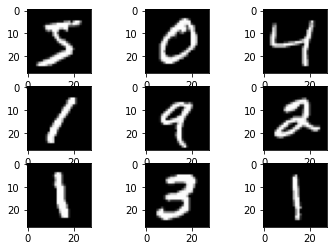

In [84]:
import matplotlib.pyplot as plt  
%matplotlib inline

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Preparando el dataset
* Vamos a transformar las imágenes de 2D a 3D: *reshape*
* Reconvertimos las imágenes (*uint8_t*) a *float* y cambiar el rango de [0,255] a [0,1]
* La salida de la red será de 10 clases (los números 0-9)
* Las imágenes serán de 28x28 pixeles

In [85]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


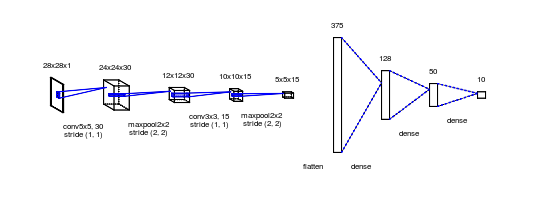

In [107]:
# construct network structure
model = keras.Sequential()

# 28x28x1 => 24x24x30
model.add(Conv2D(filters=1, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(5,5), strides=(1, 1)))

# C1 conv layer => S2 subsampling
model.add(Conv2D(filters=30, kernel_size=(5, 5), strides=(1, 1), padding="same", activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

# C3 conv layer => S4 subsampling
model.add(Conv2D(filters=15, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# C5 conv layer
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))

# F6 full connection layer
model.add(Dense(units=50, activation='relu'))

# classification
model.add(Dense(units=num_classes, activation = 'softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of model created
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 28, 28, 1)         26        
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 24, 24, 1)         0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 375)             

## Entrenamiento
* Número de epocas: **epochs**
* Número de imágenes en el batch: **batch_size**

In [108]:
epochs = 10
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8522 - accuracy: 0.7193 - val_loss: 0.1881 - val_accuracy: 0.9392
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1762 - accuracy: 0.9434 - val_loss: 0.1332 - val_accuracy: 0.9549
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1253 - accuracy: 0.9597 - val_loss: 0.1087 - val_accuracy: 0.9655
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1007 - accuracy: 0.9674 - val_loss: 0.0943 - val_accuracy: 0.9692
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0835 - accuracy: 0.9726 - val_loss: 0.0889 - val_accuracy: 0.9699
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0721 - accuracy: 0.9777 - val_loss: 0.0869 - val_accuracy: 0.9726
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0621 - accuracy: 0.9802 - val_loss: 0.0782 - val_accuracy: 0.9749
Epoch 

## Evaluación
* Vamos a evaluar el dataset *test* para comprobar la tasa de aciertos

In [109]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07736822217702866
Test accuracy: 0.9751999974250793


* Mediante la matriz de confusión se puede mostrar gráficamente el resultado de la evaluación [^2]
    * Indica el número de aciertos y fallos
    * Preponderancia en la diagonal supone que ha sido predicho en un alto porcentaje de veces correctamente
 
[^2]: https://en.wikipedia.org/wiki/Confusion_matrix

In [110]:
import numpy as np

# Predecimos de acuerdo a los datos x_test
y_pred_class = model.predict_classes(x_test)

# Convertimos la salida real en un array de valores concretos [0...9]
y_test_class = np.zeros(len(y_test))
for i in range(len(y_test)):
    y_test_class[i]=np.argmax(y_test[i])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [111]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Invocamos la matriz de confusión
cm = confusion_matrix(y_test_class, y_pred_class)

In [112]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

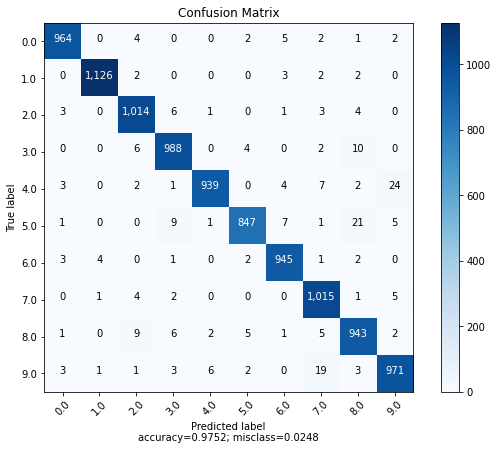

In [113]:
# Dibujamos la matriz 
plot_confusion_matrix(cm, 
                      normalize    = False,
                      target_names = np.linspace(0,9,10),
                      title        = "Confusion Matrix")

## Ejemplo de predicción
* Elegimos una imágen del dataset test (hemos guardado las imágenes originales con **x_test_orig**)
* Elección con **randint**
* Visualización e impresión del valor predecido

1/1 [==============================] - 0s 13ms/step


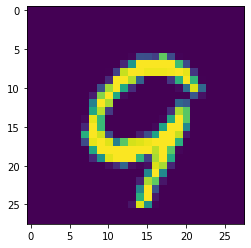

Predicted number: 9


In [115]:
import random
import numpy as np

id_random = random.randint(0,x_test_orig.shape[0])

test = x_test_orig[id_random]
test2D = test.reshape(1, img_rows, img_cols, 1)

pred = model.predict(test2D, batch_size=1, verbose=1) 

imgplot = plt.imshow(test)  
plt.show()
print("Predicted number: "+str(np.argmax(pred)))